In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [18]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,4)

# The JPA equations

A driven, parametrically modulated Duffing equation:

$$
\ddot x + \gamma x + \omega_0^2 \big(1 + \epsilon \cos(\omega_p t + \phi)\big) + \alpha x^3= F \cos(\omega_s t)
$$

Note that $\phi$ is only relevant for the so-called "degerate amplifier" condition, $\omega_p = 2 \omega_s$. 

Typically, $\omega_s = \omega_0 + \Delta$, where $\Delta < \gamma$. And $\omega_p = 2\omega_0$ (first order parametric resonance condition). 

We will pick $\omega_0 = 1$:

$$
\ddot x + \gamma x + \big(1 + \epsilon \cos(\omega_p t + \phi)\big) + \alpha x^3 = F \cos(\omega_s t)
$$

In [30]:
def solve_and_plot():
    # State vector y: 
    # y[0] = x
    # y[1] = v

    def dydt(t,y):
        x = y[0]
        v = y[1]
        dxdt = v
        dvdt = (F*np.cos(ws*t) - gam*v - x*(1+eps*np.cos(wp*t+phi)) - alpha*x**3)
        return (dxdt, dvdt)
    
    t = np.linspace(0,T,N)
    sol = solve_ivp(dydt, [0,T], [0,0], t_eval=t)
    x = sol.y[0]
    plt.plot(t,x)
    return t,x

First, start with something we know should work: the driven HO

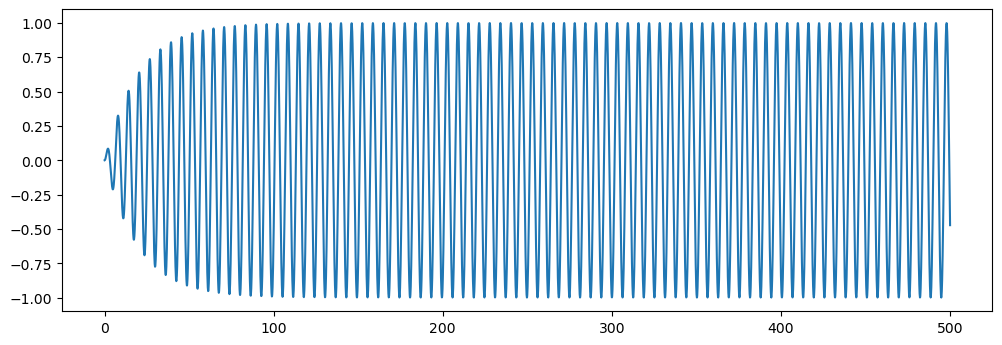

In [31]:
T = 500
gam = 0.1
eps = 0
F = 0.1
alpha = 0 
N = 5000
ws = 1
wp = 2
phi = 0
t0,x0 = solve_and_plot()

Now, let's put in parametric modulation in non-degenerate condition: 

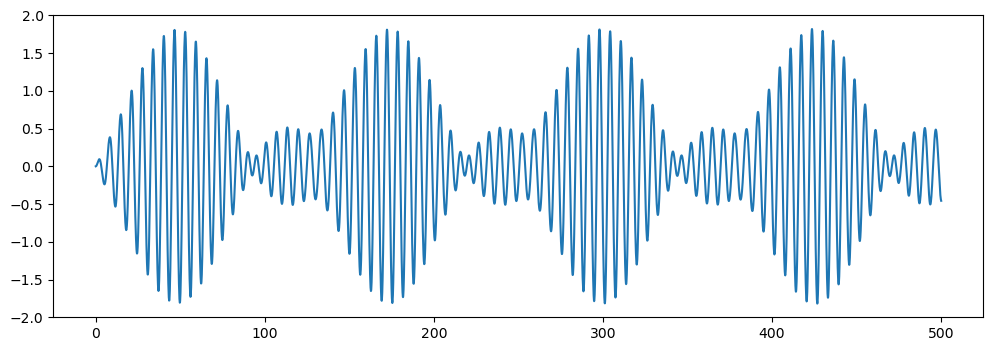

In [34]:
T = 500
gam = 0.1
eps = 0.2
F = 0.1
alpha = 0 
N = 5000
ws = 0.95
wp = 2
t1,x1 = solve_and_plot()

Now let's add some Duffing and see what happens:

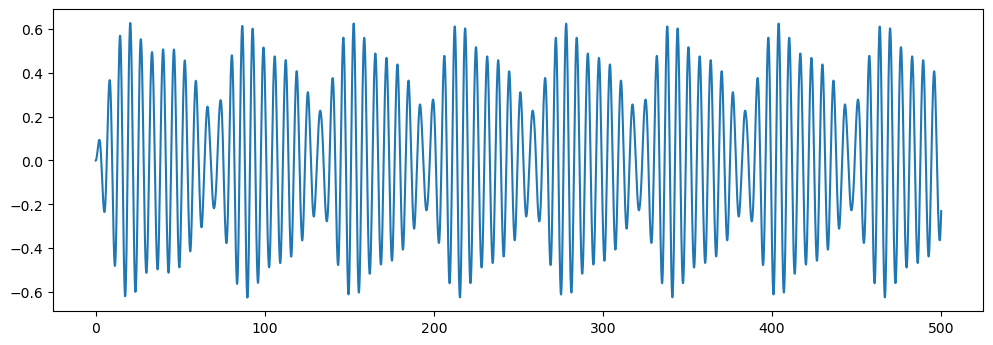

In [35]:
T = 500
gam = 0.1
eps = 0.2
F = 0.1
alpha = 1
N = 5000
ws = 0.95
wp = 2
t2,x2 = solve_and_plot()

Here, we can see saturation already:

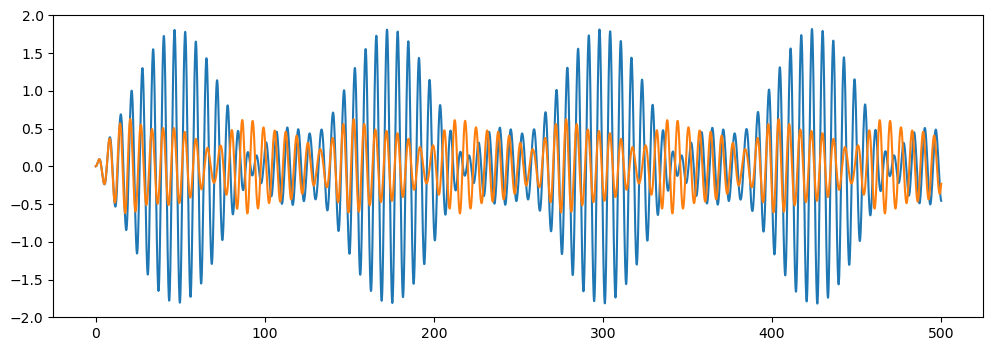

In [36]:
plt.plot(t1,x1)
plt.plot(t2,x2)